#Import Libraries

In [ ]:
!pip install --quiet optuna

optuna-integration install needed for OPTUNA pruning function

In [ ]:
#pip install optuna-integration

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Importing essential libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

# import difflib where 'City' in population is correct, and 'City' in train needs to be corrected
import difflib

from scipy.stats import uniform, randint

#training libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
import optuna

#data treatment library
from sklearn.impute import SimpleImputer

# Import Necessary Files

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/UT/Hackathon - Restaurant/Redo Folder/Train_dataset.csv')
test = pd.read_csv('/content/drive/MyDrive/UT/Hackathon - Restaurant/Redo Folder/Test_dataset.csv')
sample = pd.read_csv('/content/drive/MyDrive/UT/Hackathon - Restaurant/Redo Folder/Sample_Solution.csv')
dictionary = pd.read_csv('/content/drive/MyDrive/UT/Hackathon - Restaurant/Redo Folder/Data_Dictionary.csv')

**Review Data Dictionary**

In [ ]:
dictionary

,S No.,Variable Name,Variable Description
0,1,Registration Number,This is a restaurant ID
1,2,Annual Turnover,Annual revenue of the restaurant in INR
2,3,Cuisine,Type of cuisine served in the restaurant
3,4,City,City at which the restaurant is located
4,5,Restaurant Location,This variable determines whether the restauran...
5,6,Opening Day of Restaurant,Date of the opening of the restaurant
6,7,Facebook Popularity Quotient,"Out of 100, this is the popularity of the rest..."
7,8,Endoresed By,This variable tells us what kind of celebrity ...
8,9,Instagram Popularity Quotient,"Out of 100, this is the popularity of the rest..."
9,10,Fire Audit,This variable tells us whether the fire audit ...


# Preliminary Review Train and Test Datasets

In [ ]:
train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [ ]:
# Replace space with "_" in column names for cleanliness
train.columns = train.columns.str.replace(' ', '_')
test.columns = test.columns.str.replace(' ', '_')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration_Number            3493 non-null   int64  
 1   Annual_Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant_Location            3493 non-null   object 
 5   Opening_Day_of_Restaurant      3493 non-null   object 
 6   Facebook_Popularity_Quotient   3394 non-null   float64
 7   Endorsed_By                    3493 non-null   object 
 8   Instagram_Popularity_Quotient  3437 non-null   float64
 9   Fire_Audit                     3493 non-null   int64  
 10  Liquor_License_Obtained        3493 non-null   int64  
 11  Situated_in_a_Multi_Complex    3493 non-null   int64  
 12  Dedicated_Parking              3493 non-null   i

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration_Number            500 non-null    int64  
 1   Cuisine                        500 non-null    object 
 2   City                           500 non-null    object 
 3   Restaurant_Location            500 non-null    object 
 4   Opening_Day_of_Restaurant      500 non-null    object 
 5   Facebook_Popularity_Quotient   500 non-null    float64
 6   Endoresed_By                   500 non-null    object 
 7   Instagram_Popularity_Quotient  500 non-null    float64
 8   Fire_Audit                     500 non-null    int64  
 9   Liquor_License_Obtained        500 non-null    int64  
 10  Situated_in_a_Multi_Complex    500 non-null    int64  
 11  Dedicated_Parking              500 non-null    int64  
 12  Open_Sitting_Available         500 non-null    int

**Fix Typos in Feature Names**

In [ ]:
# Resturant type name in Resturant_Tier
train = train.rename(columns={'Resturant_Tier': 'Restaurant_Tier'})
test = test.rename(columns={'Resturant_Tier': 'Restaurant_Tier'})

In [ ]:
test = test.rename(columns={'Endoresed_By': 'Endorsed_By'})

In [ ]:
#Converting the count of missing values to the percentage of missing values present in each Variable and thus sorting it in decending format
percent = train.isnull().sum()*100/len(train)
percent.sort_values(ascending = False)

Live_Sports_Rating               94.131119
Value_Deals_Rating               77.497853
Comedy_Gigs_Rating               71.085027
Live_Music_Rating                21.900945
Overall_Restaurant_Rating         6.069281
Facebook_Popularity_Quotient      2.834240
Instagram_Popularity_Quotient     1.603206
Restaurant_Tier                   1.402806
Ambience                          0.715717
Value_for_Money                   0.000000
Hygiene_Rating                    0.000000
Food_Rating                       0.000000
Registration_Number               0.000000
Order_Wait_Time                   0.000000
Lively                            0.000000
Service                           0.000000
Comfortablility                   0.000000
Staff_Responsivness               0.000000
Restaurant_Zomato_Rating          0.000000
Restaurant_City_Tier              0.000000
Annual_Turnover                   0.000000
Restaurant_Theme                  0.000000
Restaurant_Type                   0.000000
Open_Sittin

- We'll drop initial columns where we're missing greater than 75% of data. There is no way to treat these features without negatively effecting the review.
- We'll also drop `Registration_Number` since there are the same amount of unique values as there are rows. This will not be useful for the model

In [ ]:
train.drop(['Live_Sports_Rating', 'Value_Deals_Rating', 'Comedy_Gigs_Rating', 'Registration_Number'], axis=1, inplace=True)
test.drop(['Live_Sports_Rating', 'Value_Deals_Rating', 'Comedy_Gigs_Rating', 'Registration_Number'], axis=1, inplace=True)

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual_Turnover,3493.0,3.072571e+07,2.165125e+07,3500000.0,18000000.0,30000000.00,3.700000e+07,4.000000e+08
Facebook_Popularity_Quotient,3394.0,7.793872e+01,9.829169e+00,43.0,72.0,79.00,8.574500e+01,9.776000e+01
Instagram_Popularity_Quotient,3437.0,7.440468e+01,1.094033e+01,40.0,66.0,74.05,8.240000e+01,9.870000e+01
Fire_Audit,3493.0,7.887203e-01,4.082748e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Liquor_License_Obtained,3493.0,9.882622e-01,1.077187e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Situated_in_a_Multi_Complex,3493.0,8.081878e-01,3.937825e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Dedicated_Parking,3493.0,8.018895e-01,3.986329e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Open_Sitting_Available,3493.0,8.001718e-01,3.999284e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Restaurant_Tier,3444.0,1.926539e+00,2.609297e-01,1.0,2.0,2.00,2.000000e+00,2.000000e+00
Restaurant_Zomato_Rating,3493.0,2.696536e+00,7.872713e-01,0.0,2.0,3.00,3.000000e+00,5.000000e+00


#### Treating `Opening_Day_of_Restaurant`

In [ ]:
# Changing to 'Age' which will be a useful data source for the model
train['Opening_Day_of_Restaurant'] = pd.to_datetime(train['Opening_Day_of_Restaurant'])
train['Age'] = (pd.to_datetime('today') - train['Opening_Day_of_Restaurant']).dt.days/365
train['Age'] = train['Age'].round(3)

In [ ]:
# Changing to 'Age' which will be a useful data source for the model
test['Opening_Day_of_Restaurant'] = pd.to_datetime(test['Opening_Day_of_Restaurant'])
test['Age'] = (pd.to_datetime('today') - test['Opening_Day_of_Restaurant']).dt.days/365
test['Age'] = test['Age'].round(3)

In [ ]:
train.drop('Opening_Day_of_Restaurant', axis = 1, inplace=True)

In [ ]:
test.drop('Opening_Day_of_Restaurant', axis = 1, inplace=True)

#### Treating `City`

City dataset appears to to need some cleansing. Also, it is my assumption that based on the number of unique city names, it will not be useful for the model. In terms of revenue, it is likely there is a strong correlation between population and the ability for a restaurant to obtain revenue. Therefore, we will be cleaning the data, and then pulling in external census data for 2023.

In [ ]:
#Review different City names that need treatment
sorted(train['City'].unique())

[' Chennai',
 ' Delhi',
 ' Pune',
 ' ariyalur',
 ' mumbai',
 '-1',
 'AM',
 'Agra',
 'Ahmedabad',
 'Ahmedabad ',
 'Ahmednagar',
 'Allahabad',
 'Alwar',
 'Ambala',
 'Asansol',
 'Aurangabad',
 'Australia',
 'BANGALORE',
 'BAngalore',
 'BHOPAL',
 'BHUBANESWAR',
 'Baddi HP',
 'Bahadurgarh',
 'Banagalore',
 'Bangalore',
 'Bangalore ',
 'Banglore',
 'Banglore ',
 'Bankura',
 'Bareli',
 'Baroda',
 'Bathinda',
 'Beawar',
 'Belgaum',
 'Bellary',
 'Bengaluru',
 'Bhagalpur',
 'Bharuch',
 'Bhilai',
 'Bhiwadi',
 'Bhopal',
 'Bhopal ',
 'Bhubaneshwar',
 'Bhubaneswar',
 'Bhubaneswar ',
 'Bhubneshwar',
 'Bikaner',
 'Bilaspur',
 'Bulandshahar',
 'Bundi',
 'Burdwan',
 'CHENNAI',
 'CHEYYAR',
 'Calicut',
 'Chandigarh',
 'Chandigarh ',
 'Chandrapur',
 'Chennai',
 'Chennai ',
 'Chennai & Mumbai',
 'Chennai, Bangalore',
 'Coimbatore',
 'DELHI',
 'Daman and Diu',
 'Dehradun',
 'Delhi',
 'Delhi/NCR',
 'Dhanbad',
 'Dharamshala',
 'Dharmapuri',
 'Dharuhera',
 'Dubai',
 'Durgapur',
 'Ernakulam',
 'Faridabad',
 'GRE

In [ ]:
# Cleaning spaces
train['City'] = train['City'].str.strip()

In [ ]:
# Clean spaces from test dataset
test['City'] = test ['City'].str.strip()

In [ ]:
sorted(test['City'].unique())

['-1',
 'Ahmedabad',
 'Ambala City',
 'Asifabadbanglore',
 'BANGALORE',
 'BANGLORE',
 'Banaglore',
 'Bangalore',
 'Banglore',
 'Baripada',
 'Bhopal',
 'Bhubaneshwar',
 'Bhubaneswar',
 'Bilaspur',
 'CHENNAI',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'DELHI',
 'Dammam',
 'Dausa',
 'Dehradun',
 'Delhi',
 'Faridabad',
 'GURAGAON',
 'Gorakhpur',
 'Greater Noida',
 'Gurgaon',
 'Guwahati',
 'Haldia',
 'Hissar',
 'Hubli',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Jodhpur',
 'Kanpur',
 'Karad',
 'Kochi/Cochin',
 'Kolkata',
 'Lucknow',
 'MEERUT',
 'Madurai',
 'Mainpuri',
 'Mangalore',
 'Meerut',
 'Mohali',
 'Mumbai',
 'Mysore',
 'NEW DELHI',
 'Nagpur',
 'Navi Mumbai',
 'New Delhi',
 'Noida',
 'Ongole',
 'Patiala',
 'Phagwara',
 'Pilani',
 'Pondicherry',
 'Pune',
 'RAE BARELI',
 'Raipur',
 'Rajkot',
 'Rajpura',
 'Rourkela',
 'Rudrapur',
 'Secunderabad',
 'Thane',
 'Trivandrum',
 'Vellore',
 'Yamuna Nagar',
 'bangalore',
 'bhubaneswar',
 'haryana',
 'hyderabad',
 'jAipur',
 'kanpur',
 'karnal',
 'ko

In [ ]:
train['City'].nunique()

262

In [ ]:
populations = pd.read_csv('/content/drive/MyDrive/UT/Hackathon - Restaurant/Redo Folder/India Populations - as of 041024.csv')

In [ ]:
populations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    181 non-null    object
 1   2023    181 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [ ]:
# Remove commas
populations['2023'] = populations['2023'].str.replace(',', '')
populations['2023'] = populations['2023'].astype('int64')

In [ ]:
populations.head()

,City,2023
0,Delhi,32941309
1,Mumbai (Bombay),21296517
2,Kolkata (Calcutta),15332793
3,Bangalore,13607800
4,Chennai (Madras),11776147


**Add Cities Missing from Dataset**

In [ ]:
# add Noida in City and 903000 in 2023 column in populations dataset
last_row_index = populations.shape[0]
populations.loc[last_row_index] = {'City': 'Noida', '2023': 903000}

In [ ]:
populations.loc[last_row_index] = {'City': 'Greater Noida', '2023': 903000}

In [ ]:
populations.loc[last_row_index] = {'City': 'Navi Mumbai', '2023': 2600000}

In [ ]:
# Fix capitalizations
train['City'] = train['City'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

In [ ]:
train['City'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'Mohali', 'Jhansi', 'Delhi', 'Bhubaneswar', 'Navi Mumbai',
       'Mumbai', 'New Delhi', 'Mangalore', 'Rewari', 'Gaziabaad',
       'Bhiwadi', 'Mysore', 'Rajkot', 'Greater Noida', 'Jaipur', 'Thane',
       'Maharajganj', 'Thiruvananthapuram', 'Punchkula', 'Bhubaneshwar',
       'Coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum', 'Gandhi Nagar',
       'Una', 'Daman And Diu', 'Gurgoan', 'Vsakhapttnam', 'Nagpur',
       'Bhagalpur', 'New Delhi - Jaisalmer', 'Ahmedabad', 'Kochi/cochin',
       'Bankura', 'Bengaluru', 'Kanpur', 'Vijayawada', 'Kochi', 'Beawar',
       'Alwar', 'Siliguri', 'Raipur', 'Bhopal', 'Faridabad', 'Jodhpur',
       'Udaipur', 'Muzaffarpur', 'Kolkata`', 'Bulandshahar', 'Haridwar',
       'Raigarh', 'Visakhapatnam', 'Jabalpur', 'Unnao', 'Aurangabad',
       'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'Vizag', 'Nouda',
       'Dharam

In [ ]:
# Create a list of unique cities in the population dataset
population_cities = populations['City'].unique()

# Loop through each unique city in the train dataset
for i, city in enumerate(train['City'].unique()):
  # Find the closest match to the current city in the population dataset
  closest_match = difflib.get_close_matches(city, population_cities, n=3)

  # If there is a close match, replace the city in the train dataset with the correct city
  if closest_match:
    train['City'].replace(to_replace=city, value=closest_match[0], inplace=True)

# Print the unique cities in the train dataset after correction
print(train['City'].unique())


['Bangalore' 'Indore' 'Chennai (Madras)' 'Gulbarga' 'Bhubaneswar'
 'Hyderabad' 'Noida' 'Kota' 'Purnia' '-1' 'Mohali' 'Jhansi' 'Delhi'
 'Navi Mumbai' 'Mangalore' 'Rewari' 'Gaziabaad' 'Bhiwandi' 'Mysore'
 'Rajkot' 'Greater Noida' 'Jaipur' 'Thane' 'Maharajganj'
 'Thiruvananthapuram' 'Punchkula' 'Coimbatore' 'Dhanbad' 'Lucknow'
 'Trivandrum' 'Gandhidham' 'Una' 'Daman And Diu' 'Visakhapatnam' 'Nagpur'
 'Bhagalpur' 'New Delhi - Jaisalmer' 'Ahmadabad' 'Kochi (Cochin)' 'Kanpur'
 'Vijayawada' 'Kochi' 'Hardwar' 'Alwar' 'Siliguri' 'Raipur' 'Bhopal'
 'Farrukhabad' 'Jodhpur' 'Udaipur' 'Muzaffarpur' 'Jalandhar' 'Aligarh'
 'Jabalpur' 'Unnao' 'Aurangabad' 'Belgaum' 'Dehradun' 'Durgapur'
 'Jamshedpur' 'Vizag' 'Nouda' 'Darbhanga' 'Hisar' 'Ranchi' 'Madurai'
 'Chandigarh' 'Australia' 'Cheyyar' 'Sonepat' 'Patna' 'Dindigul'
 'Barddhaman' 'Amritsar' 'Jowai' 'Kochi/cochin, Chennai And Coimbatore'
 'Neemrana' 'Tirupati' 'Calicut' 'Karimnagar' 'Dubai' 'Ahmadnagar'
 'Nashik' 'Bellary' 'Ludhiana' 'Muzaffarnagar' 

In [ ]:
train.head()

,Annual_Turnover,Cuisine,City,Restaurant_Location,Facebook_Popularity_Quotient,Endorsed_By,Instagram_Popularity_Quotient,Fire_Audit,Liquor_License_Obtained,Situated_in_a_Multi_Complex,...,Hygiene_Rating,Food_Rating,Overall_Restaurant_Rating,Live_Music_Rating,Ambience,Lively,Service,Comfortablility,Privacy,Age
0,42000000,"indian,irish",Bangalore,Near Business Hub,84.3,Not Specific,95.8,1,1,1,...,5,7,10.0,4.0,8.0,8,6,6,6,15.170
1,50000000,"indian,irish",Indore,Near Party Hub,85.4,Tier A Celebrity,85.0,1,1,1,...,7,8,9.0,NaN,5.0,7,7,3,8,15.548
2,32500000,"tibetan,italian",Chennai (Madras),Near Business Hub,85.0,Tier A Celebrity,68.2,1,1,1,...,3,7,8.0,3.0,7.0,10,5,2,8,12.715
3,110000000,"turkish,nigerian",Gulbarga,Near Party Hub,85.6,Tier A Celebrity,83.6,0,1,1,...,6,8,9.0,6.0,7.0,7,4,3,5,15.378
4,20000000,"irish,belgian",Bhubaneswar,Near Party Hub,NaN,Tier A Celebrity,76.8,1,1,1,...,4,8,6.0,NaN,NaN,6,2,4,6,14.148


In [ ]:
# Create new column Population in train where value is from column '2023' where 'City' in train and 'City' in population matches
train['Population'] = train['City'].map(dict(zip(populations['City'], populations['2023'])))

In [ ]:
train.head()

,Annual_Turnover,Cuisine,City,Restaurant_Location,Facebook_Popularity_Quotient,Endorsed_By,Instagram_Popularity_Quotient,Fire_Audit,Liquor_License_Obtained,Situated_in_a_Multi_Complex,...,Food_Rating,Overall_Restaurant_Rating,Live_Music_Rating,Ambience,Lively,Service,Comfortablility,Privacy,Age,Population
0,42000000,"indian,irish",Bangalore,Near Business Hub,84.3,Not Specific,95.8,1,1,1,...,7,10.0,4.0,8.0,8,6,6,6,15.170,13607800.0
1,50000000,"indian,irish",Indore,Near Party Hub,85.4,Tier A Celebrity,85.0,1,1,1,...,8,9.0,NaN,5.0,7,7,3,8,15.548,3302077.0
2,32500000,"tibetan,italian",Chennai (Madras),Near Business Hub,85.0,Tier A Celebrity,68.2,1,1,1,...,7,8.0,3.0,7.0,10,5,2,8,12.715,11776147.0
3,110000000,"turkish,nigerian",Gulbarga,Near Party Hub,85.6,Tier A Celebrity,83.6,0,1,1,...,8,9.0,6.0,7.0,7,4,3,5,15.378,718903.0
4,20000000,"irish,belgian",Bhubaneswar,Near Party Hub,NaN,Tier A Celebrity,76.8,1,1,1,...,8,6.0,NaN,NaN,6,2,4,6,14.148,1257642.0


In [ ]:
train.isnull().sum()

Annual_Turnover                    0
Cuisine                            0
City                               0
Restaurant_Location                0
Facebook_Popularity_Quotient      99
Endorsed_By                        0
Instagram_Popularity_Quotient     56
Fire_Audit                         0
Liquor_License_Obtained            0
Situated_in_a_Multi_Complex        0
Dedicated_Parking                  0
Open_Sitting_Available             0
Restaurant_Tier                   49
Restaurant_Type                    0
Restaurant_Theme                   0
Restaurant_Zomato_Rating           0
Restaurant_City_Tier               0
Order_Wait_Time                    0
Staff_Responsivness                0
Value_for_Money                    0
Hygiene_Rating                     0
Food_Rating                        0
Overall_Restaurant_Rating        212
Live_Music_Rating                765
Ambience                          25
Lively                             0
Service                            0
C

In [ ]:
# Return values for City where Population is null
null_population_cities_train = train[train['Population'].isnull()]['City'].unique()

In [ ]:
# Fix capitalizations
test['City'] = test['City'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

In [ ]:
# Create a list of unique cities in the population dataset
population_cities = populations['City'].unique()

# Loop through each unique city in the test dataset
for i, city in enumerate(test['City'].unique()):
  # Find the closest match to the current city in the population dataset
  closest_match = difflib.get_close_matches(city, population_cities, n=3)

  # If there is a close match, replace the city in the test dataset with the correct city
  if closest_match:
    test['City'].replace(to_replace=city, value=closest_match[0], inplace=True)

# Print the unique cities in the test dataset after correction
print(test['City'].unique())

['Bangalore' 'Hyderabad' '-1' 'Purnia' 'Delhi' 'Meerut' 'Chennai (Madras)'
 'Lucknow' 'Gulbarga' 'Navi Mumbai' 'Jalgaon' 'Ahmadabad' 'Nagpur'
 'Coimbatore' 'Patna' 'Noida' 'Kota' 'Hubli' 'Guwahati (Gauhati)' 'Mysore'
 'Jaipur' 'Mohali' 'New Dehli' 'Jabalpur' 'Chandigarh' 'Indore'
 'Bhubaneswar' 'Ambala City' 'Trivandrum' 'Ongole' 'Mangalore' 'Dehradun'
 'Thane' 'Puducherry' 'Rae Bareli' 'Farrukhabad' 'Bhilwara'
 'Latur (maharashtra )' 'Sampla' 'Hardwar' 'Raipur' 'Gorakhpur' 'Kanpur'
 'Bhopal' 'Ranchi' 'Greater Noida' 'Rajkot' 'Karnal' 'Kochi (Cochin)'
 'Warangal' 'Vellore' 'Patiala' 'Hisar' 'Yamunanagar' 'Raurkela' 'Jodhpur'
 'Kakinada' 'Durgapur' 'Madurai' 'Bilaspur' 'Dewas' 'Asifabadbanglore'
 'Rampur' 'Khammam' 'Allahabad']


In [ ]:
# Create new column Population in test where value is from column '2023' where 'City' in test and 'City' in population matches
test['Population'] = test['City'].map(dict(zip(populations['City'], populations['2023'])))

In [ ]:
# Return values for City where Population is null in test dataset
null_population_cities_test = test[test['Population'].isnull()]['City'].unique()

In [ ]:
print(sorted(null_population_cities_train))
print(sorted(null_population_cities_test))

['-1', 'Am', 'Ambala', 'Australia', 'Baddi Hp', 'Bharuch', 'Burdwan', 'Calicut', 'Cheyyar', 'Daman And Diu', 'Dharuhera', 'Dubai', 'Gagret', 'Gajiabaad', 'Gaziabaad', 'Gonda', 'Greater Noida', 'Hospete', 'Howrah', 'Hubli', 'Hyderabad(bhadurpally)', 'India', 'Indirapuram, Ghaziabad', 'Joshimath', 'Jowai', 'Kala Amb', 'Kochi', 'Kochi/cochin, Chennai And Coimbatore', 'Kudankulam ,tarapur', 'London', 'Maharajganj', 'Mettur, Tamil Nadu', 'Miryalaguda', 'Mohali', 'Muvattupuzha', 'Ncr', 'Neemrana', 'New Delhi - Jaisalmer', 'Noida', 'Nouda', 'Ongole', 'Orissa', 'Panchkula', 'Pondi', 'Pondy', 'Punchkula', 'Ras Al Khaimah', 'Ratnagiri', 'Rayagada, Odisha', 'Rewari', 'Sadulpur,rajgarh,distt-churu,rajasthan', 'Shahdol', 'Sonepat', 'Technopark, Trivandrum', 'Thane', 'Tornagallu', 'Trichy', 'Trivandrum', 'Una', 'Unnao', 'Vandavasi', 'Vapi', 'Vizag']
['-1', 'Ambala City', 'Asifabadbanglore', 'Greater Noida', 'Hubli', 'Latur (maharashtra )', 'Mohali', 'New Dehli', 'Noida', 'Ongole', 'Rae Bareli', 'Sam

In [ ]:
# Find the common elements in null_population_cities_train and null_population_cities_test
common_cities = set(null_population_cities_train).intersection(null_population_cities_test)

# Print the common elements
print(common_cities)


{'-1', 'Thane', 'Greater Noida', 'Hubli', 'Trivandrum', 'Noida', 'Ongole', 'Mohali'}


In [ ]:
sorted(population_cities)

['Agartala',
 'Agra',
 'Ahmadabad',
 'Ahmadnagar',
 'Aizawl',
 'Ajmer',
 'Akola',
 'Aligarh',
 'Allahabad',
 'Alwar',
 'Amravati',
 'Amritsar',
 'Anand',
 'Anantapur',
 'Arrah',
 'Asansol',
 'Aurangabad',
 'Baharampur',
 'Bangalore',
 'Barddhaman',
 'Bareilly',
 'Bathinda',
 'Begusarai',
 'Belgaum',
 'Bellary',
 'Bhagalpur',
 'Bhavnagar',
 'Bhilwara',
 'Bhiwandi',
 'Bhopal',
 'Bhubaneswar',
 'Bihar Sharif',
 'Bijapur',
 'Bikaner',
 'Bilaspur',
 'Bokaro Steel City',
 'Brahmapur',
 'Chandigarh',
 'Chandrapur',
 'Chennai (Madras)',
 'Cherthala',
 'Coimbatore',
 'Cuttack',
 'Darbhanga',
 'Davanagere',
 'Dehradun',
 'Delhi',
 'Deoghar',
 'Dewas',
 'Dhanbad',
 'Dhule',
 'Dhulian',
 'Dindigul',
 'Durg-Bhilainagar',
 'Durgapur',
 'English Bazar',
 'Erode',
 'Farrukhabad',
 'Firozabad',
 'Gandhidham',
 'Gaya',
 'Gorakhpur',
 'Gulbarga',
 'Guntur',
 'Guwahati (Gauhati)',
 'Gwalior',
 'Habra',
 'Haldwani-cum-kathgodam',
 'Hapur',
 'Hardwar',
 'Hisar',
 'Hosur',
 'Hubli-Dharwad',
 'Hyderabad',
 'I

In [ ]:
test['Population'].isnull().sum()

124

In [ ]:
# prompt: find number of values as '-1' in column City for train and test
print("Train:", train['City'].value_counts()["-1"])
print("Test:", test['City'].value_counts()["-1"])

Train: 396
Test: 65


In [ ]:
# New value insert above not working so manually entering value of Noida
train.loc[train['City'] == 'Greater Noida', 'Population'] = 903000
test.loc[test['City'] == 'Greater Noida', 'Population'] = 903000

In [ ]:
# prompt: find value counts for each of the City values where population is null
train_null_population_cities_value_counts = train[train['Population'].isnull()]['City'].value_counts()
test_null_population_cities_value_counts = test[test['Population'].isnull()]['City'].value_counts()
print("Train:")
print(train_null_population_cities_value_counts)
print("Test:")
print(test_null_population_cities_value_counts)

Train:
City
-1                     396
Noida                  345
Mohali                  10
Trivandrum               9
Thane                    6
                      ... 
Rewari                   1
Kudankulam ,tarapur      1
Ongole                   1
Punchkula                1
Pondy                    1
Name: count, Length: 62, dtype: int64
Test:
City
-1                      65
Noida                   44
Mohali                   3
Hubli                    1
New Dehli                1
Ambala City              1
Trivandrum               1
Ongole                   1
Thane                    1
Rae Bareli               1
Latur (maharashtra )     1
Sampla                   1
Asifabadbanglore         1
Name: count, dtype: int64


In [ ]:
train.drop(["City", "Cuisine"], axis = 1, inplace=True)
test.drop(["City", "Cuisine"], axis = 1, inplace=True)

In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Facebook_Popularity_Quotient,500.0,7.754124e+01,1.008362e+01,46.000,7.057500e+01,79.000,8.523250e+01,9.680000e+01
Instagram_Popularity_Quotient,500.0,7.475326e+01,1.133720e+01,47.000,6.591500e+01,75.000,8.360000e+01,9.720000e+01
Fire_Audit,500.0,8.140000e-01,3.894964e-01,0.000,1.000000e+00,1.000,1.000000e+00,1.000000e+00
Liquor_License_Obtained,500.0,9.860000e-01,1.176081e-01,0.000,1.000000e+00,1.000,1.000000e+00,1.000000e+00
Situated_in_a_Multi_Complex,500.0,7.880000e-01,4.091342e-01,0.000,1.000000e+00,1.000,1.000000e+00,1.000000e+00
Dedicated_Parking,500.0,8.080000e-01,3.942675e-01,0.000,1.000000e+00,1.000,1.000000e+00,1.000000e+00
Open_Sitting_Available,500.0,8.040000e-01,3.973661e-01,0.000,1.000000e+00,1.000,1.000000e+00,1.000000e+00
Restaurant_Tier,500.0,1.932000e+00,2.519980e-01,1.000,2.000000e+00,2.000,2.000000e+00,2.000000e+00
Restaurant_Zomato_Rating,500.0,2.704000e+00,7.782000e-01,1.000,2.000000e+00,3.000,3.000000e+00,5.000000e+00
Restaurant_City_Tier,500.0,2.920000e-01,4.551377e-01,0.000,0.000000e+00,0.000,1.000000e+00,1.000000e+00


#### Review Data for Outliers before missing value treatment

<function matplotlib.pyplot.show(close=None, block=None)>

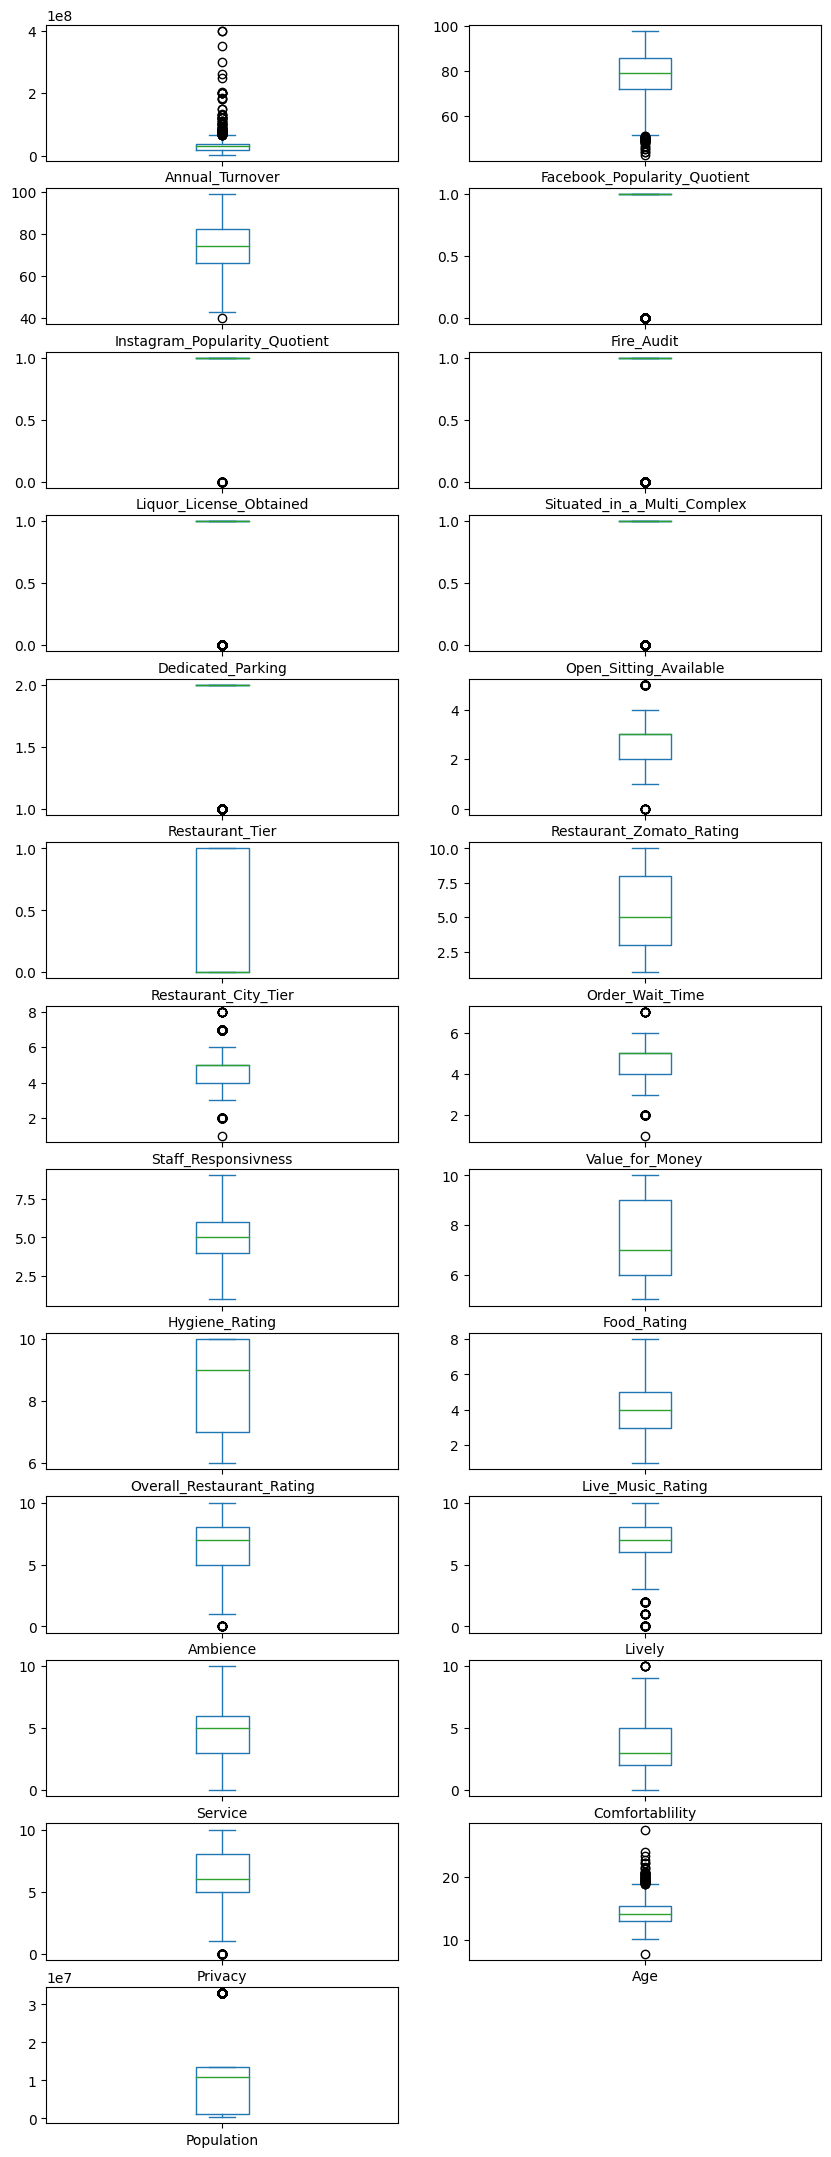

In [ ]:
train.plot(kind='box', subplots=True, figsize=(10,40), layout=(19,2), sharex= False, sharey = False)
plt.show

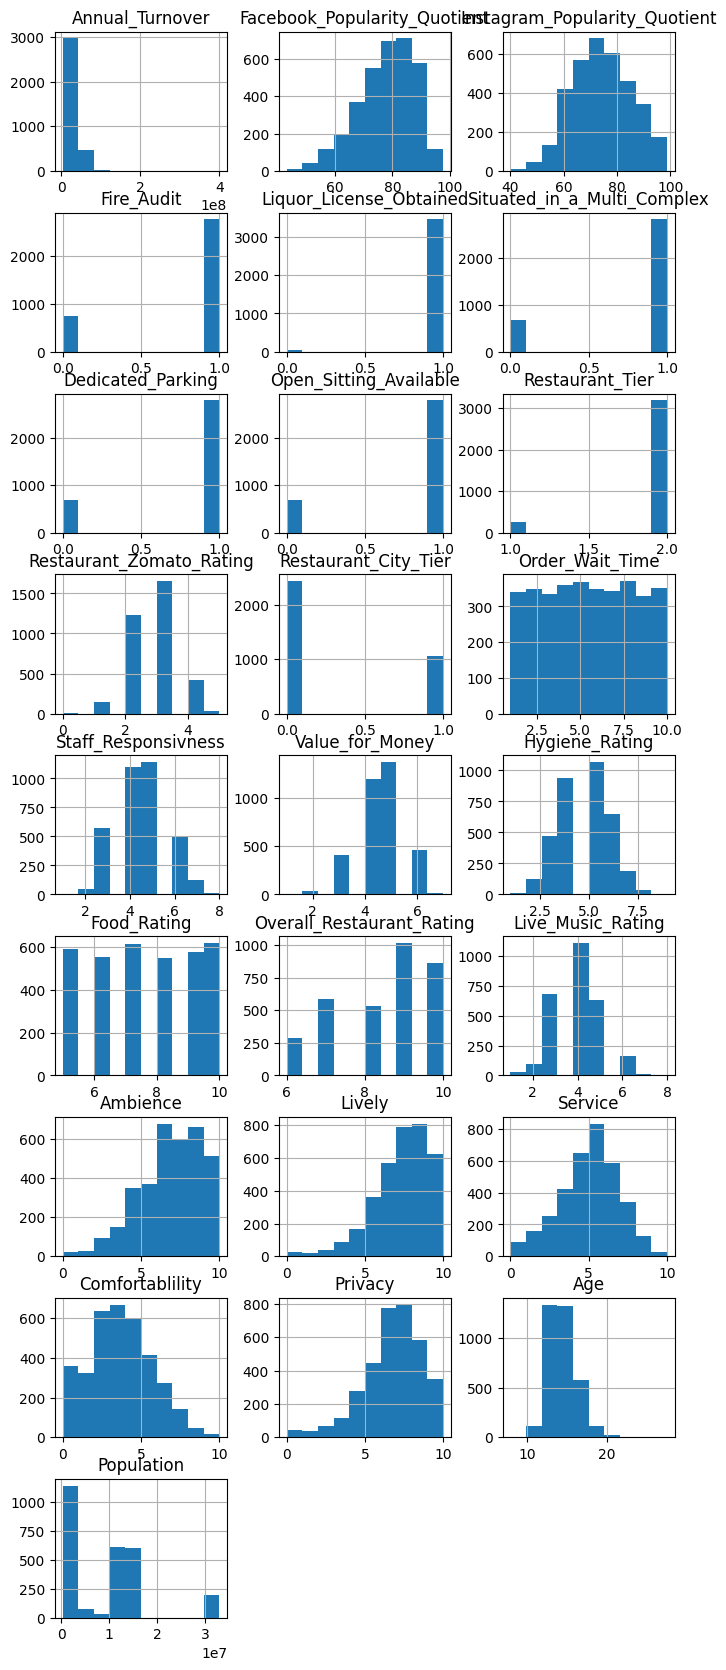

In [ ]:
cat_df = train.select_dtypes(include=np.number)
cat_df.hist(layout = (13,3), figsize=(8, 30))
plt.show()

# Univariate Analysis - Fine Tuning Model

#### `Annual_Turnover`

In [ ]:
fig = px.box(train, x="Annual_Turnover", title="Annual Turnover Boxplot")
fig.show()


In [ ]:
fig = px.histogram(train, x="Annual_Turnover", title="Annual Turnover Histogram")
fig.show()


In [ ]:
# Need to treat outliers in Annual Turnover. Choosing $96M as it is the end of the break in data
train[train['Annual_Turnover'] > 202000000].shape[0]

7

In [ ]:
train.loc[train['Annual_Turnover'] > 202000000, 'Annual_Turnover'] = 202000000

#### `Facebook_Popularity_Quotient`

In [ ]:
fig = px.box(train, x="Facebook_Popularity_Quotient", title="Facebook Popularity")
fig.show()

In [ ]:
fig = px.histogram(train, x="Facebook_Popularity_Quotient", title="Facebook Popularity")
fig.show()

In [ ]:
# Need to treat outliers in Annual Turnover.
train[train['Facebook_Popularity_Quotient'] < 51.6].shape[0]

31

In [ ]:
train.loc[train['Facebook_Popularity_Quotient'] < 51.6, 'Facebook_Popularity_Quotient'] = 51.6

#### `Age`

In [ ]:
fig = px.box(train, x="Age", title="Age")
fig.show()

In [ ]:
fig = px.histogram(train, x="Age", title="Age")
fig.show()

In [ ]:
train[train['Age'] > 24].shape[0]

1

In [ ]:
train.loc[train['Age'] > 24, 'Age'] = 24

#### `Population`

In [ ]:
fig = px.box(train, x="Population", title="Population")
fig.show()

In [ ]:
train.loc[train['Population'] > 14000000, 'Population'] = 14000000

In [ ]:
import plotly.figure_factory as ff

corr_matrix = cat_df.corr()

# Generate the heatmap
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=corr_matrix.round(2).values,
    showscale=True
)

fig.show()


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual_Turnover,3493.0,3.051071e+07,1.902521e+07,3500000.000,1.800000e+07,3.000000e+07,3.700000e+07,2.020000e+08
Facebook_Popularity_Quotient,3394.0,7.796548e+01,9.750713e+00,51.600,7.200000e+01,7.900000e+01,8.574500e+01,9.776000e+01
Instagram_Popularity_Quotient,3437.0,7.440468e+01,1.094033e+01,40.000,6.600000e+01,7.405000e+01,8.240000e+01,9.870000e+01
Fire_Audit,3493.0,7.887203e-01,4.082748e-01,0.000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Liquor_License_Obtained,3493.0,9.882622e-01,1.077187e-01,0.000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Situated_in_a_Multi_Complex,3493.0,8.081878e-01,3.937825e-01,0.000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Dedicated_Parking,3493.0,8.018895e-01,3.986329e-01,0.000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Open_Sitting_Available,3493.0,8.001718e-01,3.999284e-01,0.000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Restaurant_Tier,3444.0,1.926539e+00,2.609297e-01,1.000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
Restaurant_Zomato_Rating,3493.0,2.696536e+00,7.872713e-01,0.000,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00


## Address Missing Values

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual_Turnover                3493 non-null   int64  
 1   Restaurant_Location            3493 non-null   object 
 2   Facebook_Popularity_Quotient   3394 non-null   float64
 3   Endorsed_By                    3493 non-null   object 
 4   Instagram_Popularity_Quotient  3437 non-null   float64
 5   Fire_Audit                     3493 non-null   int64  
 6   Liquor_License_Obtained        3493 non-null   int64  
 7   Situated_in_a_Multi_Complex    3493 non-null   int64  
 8   Dedicated_Parking              3493 non-null   int64  
 9   Open_Sitting_Available         3493 non-null   int64  
 10  Restaurant_Tier                3444 non-null   float64
 11  Restaurant_Type                3493 non-null   object 
 12  Restaurant_Theme               3493 non-null   o

In [ ]:
# Where population isnull drop rows
train = train.dropna(subset=['Population'])
train.reset_index(inplace=True, drop=True)

#### SimpleImputer treat with Median
- Treating values with Median after reviewing the boxplots and histograms above

In [ ]:
treat_values = ['Population', 'Live_Music_Rating', 'Overall_Restaurant_Rating', 'Facebook_Popularity_Quotient', 'Instagram_Popularity_Quotient', 'Restaurant_Tier', 'Ambience']

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
imputer.fit(train[treat_values])
train[treat_values] = imputer.transform(train[treat_values])

In [ ]:
# revisit the null values as a percent
percent = train.isnull().sum()*100/len(train)
percent.sort_values(ascending = False)

Annual_Turnover                  0.0
Order_Wait_Time                  0.0
Age                              0.0
Privacy                          0.0
Comfortablility                  0.0
Service                          0.0
Lively                           0.0
Ambience                         0.0
Live_Music_Rating                0.0
Overall_Restaurant_Rating        0.0
Food_Rating                      0.0
Hygiene_Rating                   0.0
Value_for_Money                  0.0
Staff_Responsivness              0.0
Restaurant_City_Tier             0.0
Restaurant_Location              0.0
Restaurant_Zomato_Rating         0.0
Restaurant_Theme                 0.0
Restaurant_Type                  0.0
Restaurant_Tier                  0.0
Open_Sitting_Available           0.0
Dedicated_Parking                0.0
Situated_in_a_Multi_Complex      0.0
Liquor_License_Obtained          0.0
Fire_Audit                       0.0
Instagram_Popularity_Quotient    0.0
Endorsed_By                      0.0
F

In [ ]:
imputer.fit(test[treat_values])
test[treat_values] = imputer.transform(test[treat_values])

In [ ]:
# revisit the null values as a percent
percent = test.isnull().sum()*100/len(test)
percent.sort_values(ascending = False)

Restaurant_Location              0.0
Facebook_Popularity_Quotient     0.0
Age                              0.0
Privacy                          0.0
Comfortablility                  0.0
Service                          0.0
Lively                           0.0
Ambience                         0.0
Live_Music_Rating                0.0
Overall_Restaurant_Rating        0.0
Food_Rating                      0.0
Hygiene_Rating                   0.0
Value_for_Money                  0.0
Staff_Responsivness              0.0
Order_Wait_Time                  0.0
Restaurant_City_Tier             0.0
Restaurant_Zomato_Rating         0.0
Restaurant_Theme                 0.0
Restaurant_Type                  0.0
Restaurant_Tier                  0.0
Open_Sitting_Available           0.0
Dedicated_Parking                0.0
Situated_in_a_Multi_Complex      0.0
Liquor_License_Obtained          0.0
Fire_Audit                       0.0
Instagram_Popularity_Quotient    0.0
Endorsed_By                      0.0
P

**Restaurant_Theme**

In [ ]:
# Grouping all the themes under 5% in 'other' section, and replacing values below with "Other"
z =train['Restaurant_Theme'].value_counts()/len(train)*100
y = z[z.apply(lambda x:x<6)]
train['Restaurant_Theme'] = train['Restaurant_Theme'].apply(lambda x :'other' if x in y else x)
train['Restaurant_Theme']

0       Arabian
1         Greek
2          90's
3       Arabian
4         Greek
         ...   
2650       90's
2651      Greek
2652      other
2653      Greek
2654      Greek
Name: Restaurant_Theme, Length: 2655, dtype: object

In [ ]:
train['Restaurant_Theme'].unique()

array(['Arabian', 'Greek', "90's", 'other'], dtype=object)

In [ ]:
# Grouping all the themes under 5% in 'other' section, and replacing values below with "Other"
z =test['Restaurant_Theme'].value_counts()/len(test)*100
y = z[z.apply(lambda x:x<6)]
test['Restaurant_Theme'] = test['Restaurant_Theme'].apply(lambda x :'other' if x in y else x)
test['Restaurant_Theme']

0        Greek
1        other
2        Greek
3         90's
4        other
        ...   
495       90's
496       90's
497       90's
498      Greek
499    Arabian
Name: Restaurant_Theme, Length: 500, dtype: object

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual_Turnover                2655 non-null   int64  
 1   Restaurant_Location            2655 non-null   object 
 2   Facebook_Popularity_Quotient   2655 non-null   float64
 3   Endorsed_By                    2655 non-null   object 
 4   Instagram_Popularity_Quotient  2655 non-null   float64
 5   Fire_Audit                     2655 non-null   int64  
 6   Liquor_License_Obtained        2655 non-null   int64  
 7   Situated_in_a_Multi_Complex    2655 non-null   int64  
 8   Dedicated_Parking              2655 non-null   int64  
 9   Open_Sitting_Available         2655 non-null   int64  
 10  Restaurant_Tier                2655 non-null   float64
 11  Restaurant_Type                2655 non-null   object 
 12  Restaurant_Theme               2655 non-null   o

#### Dropping Columns after Initial Review

The following columns are dropped as they are below a threshold of 0.1 after initial run showing feature importance

In [ ]:
train.drop(['Endorsed_By'], axis = 1, inplace = True)
test.drop(['Endorsed_By'], axis = 1, inplace = True)

# Prepping Data for Training

In [ ]:
X = train.drop("Annual_Turnover", axis = 1)
y = train.pop("Annual_Turnover")

In [ ]:
X.head()

,Restaurant_Location,Facebook_Popularity_Quotient,Instagram_Popularity_Quotient,Fire_Audit,Liquor_License_Obtained,Situated_in_a_Multi_Complex,Dedicated_Parking,Open_Sitting_Available,Restaurant_Tier,Restaurant_Type,...,Food_Rating,Overall_Restaurant_Rating,Live_Music_Rating,Ambience,Lively,Service,Comfortablility,Privacy,Age,Population
0,Near Business Hub,84.3,95.8,1,1,1,0,1,2.0,Bar,...,7,10.0,4.0,8.0,8,6,6,6,15.170,13607800.0
1,Near Party Hub,85.4,85.0,1,1,1,1,0,2.0,Bar,...,8,9.0,4.0,5.0,7,7,3,8,15.548,3302077.0
2,Near Business Hub,85.0,68.2,1,1,1,1,0,2.0,Bar,...,7,8.0,3.0,7.0,10,5,2,8,12.715,11776147.0
3,Near Party Hub,85.6,83.6,0,1,1,1,1,1.0,Bar,...,8,9.0,6.0,7.0,7,4,3,5,15.378,718903.0
4,Near Party Hub,79.6,76.8,1,1,1,1,1,2.0,Bar,...,8,6.0,4.0,7.0,6,2,4,6,14.148,1257642.0


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2655 entries, 0 to 2654
Series name: Annual_Turnover
Non-Null Count  Dtype
--------------  -----
2655 non-null   int64
dtypes: int64(1)
memory usage: 20.9 KB


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Restaurant_Location            2655 non-null   object 
 1   Facebook_Popularity_Quotient   2655 non-null   float64
 2   Instagram_Popularity_Quotient  2655 non-null   float64
 3   Fire_Audit                     2655 non-null   int64  
 4   Liquor_License_Obtained        2655 non-null   int64  
 5   Situated_in_a_Multi_Complex    2655 non-null   int64  
 6   Dedicated_Parking              2655 non-null   int64  
 7   Open_Sitting_Available         2655 non-null   int64  
 8   Restaurant_Tier                2655 non-null   float64
 9   Restaurant_Type                2655 non-null   object 
 10  Restaurant_Theme               2655 non-null   object 
 11  Restaurant_Zomato_Rating       2655 non-null   int64  
 12  Restaurant_City_Tier           2655 non-null   i

**Note** After reviewing feature importances after an initial run, we dropped all of the categorical data as it fell below a threshold of 0.1. Therefore, we don't need the code below for get_dummies.

In [ ]:
X_cat = X.select_dtypes(exclude = np.number)
X_dum = pd.get_dummies(X_cat)
X_num = X.select_dtypes(include = np.number)

In [ ]:
X_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Restaurant_Location_Near Business Hub     2655 non-null   bool 
 1   Restaurant_Location_Near Party Hub        2655 non-null   bool 
 2   Restaurant_Type_Bar                       2655 non-null   bool 
 3   Restaurant_Type_Buffet/Family Restaurant  2655 non-null   bool 
 4   Restaurant_Type_Caffee                    2655 non-null   bool 
 5   Restaurant_Type_Gastro Bar                2655 non-null   bool 
 6   Restaurant_Theme_90's                     2655 non-null   bool 
 7   Restaurant_Theme_Arabian                  2655 non-null   bool 
 8   Restaurant_Theme_Greek                    2655 non-null   bool 
 9   Restaurant_Theme_other                    2655 non-null   bool 
dtypes: bool(10)
memory usage: 26.1 KB


In [ ]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Facebook_Popularity_Quotient   2655 non-null   float64
 1   Instagram_Popularity_Quotient  2655 non-null   float64
 2   Fire_Audit                     2655 non-null   int64  
 3   Liquor_License_Obtained        2655 non-null   int64  
 4   Situated_in_a_Multi_Complex    2655 non-null   int64  
 5   Dedicated_Parking              2655 non-null   int64  
 6   Open_Sitting_Available         2655 non-null   int64  
 7   Restaurant_Tier                2655 non-null   float64
 8   Restaurant_Zomato_Rating       2655 non-null   int64  
 9   Restaurant_City_Tier           2655 non-null   int64  
 10  Order_Wait_Time                2655 non-null   int64  
 11  Staff_Responsivness            2655 non-null   int64  
 12  Value_for_Money                2655 non-null   i

In [ ]:
ct = ColumnTransformer([('scaled', StandardScaler(), [])], remainder='passthrough', verbose_feature_names_out=False)
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaled', StandardScaler(), [])],
                  verbose_feature_names_out=False)

In [ ]:
X_new = ct.fit_transform(X_num)
X_new = pd.DataFrame(X_new, columns = ct.get_feature_names_out())

In [ ]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Facebook_Popularity_Quotient   2655 non-null   float64
 1   Instagram_Popularity_Quotient  2655 non-null   float64
 2   Fire_Audit                     2655 non-null   float64
 3   Liquor_License_Obtained        2655 non-null   float64
 4   Situated_in_a_Multi_Complex    2655 non-null   float64
 5   Dedicated_Parking              2655 non-null   float64
 6   Open_Sitting_Available         2655 non-null   float64
 7   Restaurant_Tier                2655 non-null   float64
 8   Restaurant_Zomato_Rating       2655 non-null   float64
 9   Restaurant_City_Tier           2655 non-null   float64
 10  Order_Wait_Time                2655 non-null   float64
 11  Staff_Responsivness            2655 non-null   float64
 12  Value_for_Money                2655 non-null   f

In [ ]:
X_new.reset_index(drop=True)
X_dum.reset_index(drop=True)
X = pd.concat([X_new, X_dum], axis=1)
X

,Facebook_Popularity_Quotient,Instagram_Popularity_Quotient,Fire_Audit,Liquor_License_Obtained,Situated_in_a_Multi_Complex,Dedicated_Parking,Open_Sitting_Available,Restaurant_Tier,Restaurant_Zomato_Rating,Restaurant_City_Tier,...,Restaurant_Location_Near Business Hub,Restaurant_Location_Near Party Hub,Restaurant_Type_Bar,Restaurant_Type_Buffet/Family Restaurant,Restaurant_Type_Caffee,Restaurant_Type_Gastro Bar,Restaurant_Theme_90's,Restaurant_Theme_Arabian,Restaurant_Theme_Greek,Restaurant_Theme_other
0,84.30,95.8,1.0,1.0,1.0,0.0,1.0,2.0,3.0,0.0,...,True,False,True,False,False,False,False,True,False,False
1,85.40,85.0,1.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,...,False,True,True,False,False,False,False,False,True,False
2,85.00,68.2,1.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,...,True,False,True,False,False,False,True,False,False,False
3,85.60,83.6,0.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,False,True,True,False,False,False,False,True,False,False
4,79.60,76.8,1.0,1.0,1.0,1.0,1.0,2.0,3.0,0.0,...,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,68.00,70.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,...,False,True,True,False,False,False,True,False,False,False
2651,91.00,96.3,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,...,False,True,True,False,False,False,False,False,True,False
2652,80.83,86.8,1.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,...,False,True,True,False,False,False,False,False,False,True
2653,79.40,86.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,...,False,True,True,False,False,False,False,False,True,False


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Facebook_Popularity_Quotient              2655 non-null   float64
 1   Instagram_Popularity_Quotient             2655 non-null   float64
 2   Fire_Audit                                2655 non-null   float64
 3   Liquor_License_Obtained                   2655 non-null   float64
 4   Situated_in_a_Multi_Complex               2655 non-null   float64
 5   Dedicated_Parking                         2655 non-null   float64
 6   Open_Sitting_Available                    2655 non-null   float64
 7   Restaurant_Tier                           2655 non-null   float64
 8   Restaurant_Zomato_Rating                  2655 non-null   float64
 9   Restaurant_City_Tier                      2655 non-null   float64
 10  Order_Wait_Time                     

In [ ]:
X.columns

Index(['Facebook_Popularity_Quotient', 'Instagram_Popularity_Quotient',
       'Fire_Audit', 'Liquor_License_Obtained', 'Situated_in_a_Multi_Complex',
       'Dedicated_Parking', 'Open_Sitting_Available', 'Restaurant_Tier',
       'Restaurant_Zomato_Rating', 'Restaurant_City_Tier', 'Order_Wait_Time',
       'Staff_Responsivness', 'Value_for_Money', 'Hygiene_Rating',
       'Food_Rating', 'Overall_Restaurant_Rating', 'Live_Music_Rating',
       'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy', 'Age',
       'Population', 'Restaurant_Location_Near Business Hub',
       'Restaurant_Location_Near Party Hub', 'Restaurant_Type_Bar',
       'Restaurant_Type_Buffet/Family Restaurant', 'Restaurant_Type_Caffee',
       'Restaurant_Type_Gastro Bar', 'Restaurant_Theme_90's',
       'Restaurant_Theme_Arabian', 'Restaurant_Theme_Greek',
       'Restaurant_Theme_other'],
      dtype='object')

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# XGBoost Regressor

## Train

#### Import XGBoost Library

In [ ]:
# Define RMSE as a scorer function
#def rmse(y_true, y_pred):
#    return np.sqrt(metrics.mean_squared_error(y_true, y_pred))

#rmse_scorer = metrics.make_scorer(rmse, greater_is_better=False)

# Initialize the XGBRegressor
#xgb_tuned = xgb.XGBRegressor(eval_metric='rmse', random_state=42)

# Grid of parameters to choose from
#parameters = {
#    "n_estimators": [50, 100, 200, 300],
#    "max_depth": randint(3, 10),
#    "min_child_weight": [1, 2, 4],
#    "gamma": uniform(0, 0.5),
#    "subsample": [0.6, 0.8, 1.0],
#    "colsample_bytree": [0.6, 0.8, 1.0],
#    "learning_rate": [0.01, 0.05, 0.1],
#    "colsample_bylevel": [0.6, 0.8, 1.0],
#    "lambda": uniform(0,1),
#    "alpha": uniform(0,1)
#}

# Running randomized search with cross-validation
#grid_obj = RandomizedSearchCV(
#    estimator=xgb_tuned,
#    param_distributions=parameters,
#    scoring=rmse_scorer,
#    n_iter=200,
#    cv=5,
#    verbose=3,
#    random_state=42,
#    n_jobs=1
#)

# Fit the randomized search model
#grid_obj.fit(X_train, y_train)

# Extract the best estimator
#xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
#xgb_tuned.fit(X_train, y_train, verbose=True)


#y_pred = xgb_tuned.predict(X_test)
#print("Optimized RMSE:", rmse(y_test, y_pred))

In [ ]:
#print(xgb_tuned)

In [ ]:
# Review feature importance

#importances = xgb_tuned.feature_importances_
#features = X.columns
#indices = np.argsort(importances)

#plt.figure(figsize=(10, 10))
#plt.title('Feature Importances')
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
#plt.xlabel('Relative Importance')
#plt.show()


In [ ]:
#train_rmse = rmse(y_train, xgb_tuned.predict(X_train))
#test_rmse = rmse(y_test, xgb_tuned.predict(X_test))

#print("Train RMSE:", train_rmse)
#print("Test RMSE:", test_rmse)


Previous:
Train RMSE: 11886440.866429068
Test RMSE: 12790687.65399634

In [ ]:
#y_pred = xgb_tuned.predict(X_test)
#predict = pd.DataFrame({'Predicted':y_pred.astype(int)})
#predict.head()

In [ ]:
#review = pd.DataFrame(y_test)
#predict.reset_index(drop=True, inplace = True)
#review.reset_index(drop=True, inplace =True)
#compare = pd.concat([predict, review], axis = 1)
#compare

## Test Data

# XGB Data

In [ ]:
#xgb_predict = pd.DataFrame(xgb_tuned.predict(X_test_data)).apply(lambda x: '%.5f' % x, axis = 1)
#xgb_predict = pd.DataFrame(xgb_predict)
#xgb_predict = xgb_predict.rename(columns = {0: 'Annual Turnover'}, inplace = False)
#xgb_predict

In [ ]:
#xgb_submit = pd.read_csv('/content/drive/MyDrive/UT/Hackathon - Restaurant/Sample_Solution.csv')
#xgb_submit = xgb_submit.drop('Annual Turnover',axis='columns')
#xgb_submit

In [ ]:
#xgb_final = pd.concat([xgb_submit,xgb_predict], axis=1)
#xgb_final = xgb_final.dropna()
#xgb_final

In [ ]:
#xgb_final.to_csv('/content/drive/MyDrive/UT/Hackathon - Restaurant/XGBoost Revised Submission - Wes Henderson.csv', index=False)

#OPTUNA

### Optuna Train

In [ ]:
X_trainval, X_valid, y_trainval, y_valid = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
"""
#Optuna with pruning

def objective(trial):
     Suggest model hyperparameters
    params = {
        'lambda': trial.suggest_loguniform('lambda', 7.0, 17.0),
        'alpha': trial.suggest_loguniform('alpha', 7.0, 17.0),
        'eta': trial.suggest_discrete_uniform('eta', 0.3, 1.0, 0.1),
        'gamma': trial.suggest_int('gamma', 18, 25),
        'learning_rate': trial.suggest_float('learning_rate', 0.008, 0.02, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0, step=0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 8, 600),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1, step=0.1),
        'random_state': 42
    }

    model = XGBRegressor(**params, eval_metric='rmse')
    model.fit(X_trainval, y_trainval, eval_set=[(X_valid, y_valid)], verbose=False,
              callbacks=[optuna.integration.XGBoostPruningCallback(trial, "validation_0-rmse")])

    y_pred = model.predict(X_valid)
    rmse_score = np.sqrt(mean_squared_error(y_valid, y_pred))

    return rmse_score

#Creating a study object with the Median pruner
pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10, interval_steps=3)
study = optuna.create_study(direction='minimize', pruner=pruner)
study.optimize(objective, n_trials=2000)

#Output the study results
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("  Value: {:.3f}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
"""

'\n#Optuna with pruning\n\ndef objective(trial):\n     Suggest model hyperparameters\n    params = {\n        \'lambda\': trial.suggest_loguniform(\'lambda\', 7.0, 17.0),\n        \'alpha\': trial.suggest_loguniform(\'alpha\', 7.0, 17.0),\n        \'eta\': trial.suggest_discrete_uniform(\'eta\', 0.3, 1.0, 0.1),\n        \'gamma\': trial.suggest_int(\'gamma\', 18, 25),\n        \'learning_rate\': trial.suggest_float(\'learning_rate\', 0.008, 0.02, log=True),\n        \'colsample_bytree\': trial.suggest_float(\'colsample_bytree\', 0.3, 1.0, step=0.1),\n        \'n_estimators\': trial.suggest_int(\'n_estimators\', 100, 1000),\n        \'min_child_weight\': trial.suggest_int(\'min_child_weight\', 8, 600),\n        \'max_depth\': trial.suggest_int(\'max_depth\', 3, 10),\n        \'subsample\': trial.suggest_float(\'subsample\', 0.5, 1, step=0.1),\n        \'random_state\': 42\n    }\n\n    model = XGBRegressor(**params, eval_metric=\'rmse\')\n    model.fit(X_trainval, y_trainval, eval_set=[

In [ ]:
#Optuna hyperparameter optimizer without pruning

def objective(trial):
    params = {
        'lambda': trial.suggest_loguniform('lambda', 7.0, 20.0),
        'alpha': trial.suggest_loguniform('alpha', 7.0, 20.0),
        'eta': trial.suggest_discrete_uniform('eta', 0.3, 0.7, 0.1),
        'gamma': trial.suggest_int('gamma', 5, 25),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.015, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0, step=0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 8, 600),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1, step=0.1),
        'random_state': 42
    }

    model = XGBRegressor(**params, eval_metric = 'rmse')
    model.fit(X_trainval, y_trainval, eval_set=[(X_valid, y_valid)], verbose=False)
    y_pred = model.predict(X_valid)
    rmse_score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return rmse_score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("  Value: {:.3f}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-04-13 17:08:03,329] A new study created in memory with name: no-name-0b83ce29-85a7-4a9a-8c21-118b9d1add47
[I 2024-04-13 17:08:03,505] Trial 0 finished with value: 15491296.648898782 and parameters: {'lambda': 17.423466601308533, 'alpha': 11.529371410138147, 'eta': 0.6000000000000001, 'gamma': 9, 'learning_rate': 0.010738361963111127, 'colsample_bytree': 0.5, 'n_estimators': 101, 'min_child_weight': 194, 'max_depth': 6, 'subsample': 0.9}. Best is trial 0 with value: 15491296.648898782.
[I 2024-04-13 17:08:04,147] Trial 1 finished with value: 14933260.576472135 and parameters: {'lambda': 8.93647457499933, 'alpha': 8.464301198566536, 'eta': 0.4, 'gamma': 8, 'learning_rate': 0.010259521963866973, 'colsample_bytree': 0.8, 'n_estimators': 465, 'min_child_weight': 229, 'max_depth': 6, 'subsample': 0.9}. Best is trial 1 with value: 14933260.576472135.
[I 2024-04-13 17:08:05,084] Trial 2 finished with value: 14606715.776982985 and parameters: {'lambda': 17.633229944518156, 'alpha': 13.5

In [ ]:
#fig = optuna.visualization.plot_param_importances(study)
#fig.update_layout(template='plotly_dark', title = '<b>Hyperparameter Importances', title_x = 0.5)

In [ ]:
print("Best parameters:", study.best_params)
best_params = study.best_params
best_xgb = xgb.XGBRegressor(**best_params, eval_metric='rmse', random_state=42)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

Best parameters: {'lambda': 7.553450192099335, 'alpha': 8.517064068909091, 'eta': 0.3, 'gamma': 24, 'learning_rate': 0.014053864213737152, 'colsample_bytree': 0.4, 'n_estimators': 997, 'min_child_weight': 62, 'max_depth': 3, 'subsample': 1.0}


Best parameters: {'lambda': 7.4768479660726905, 'alpha': 8.650773120192998, 'eta': 0.6000000000000001, 'gamma': 21, 'learning_rate': 0.019645064502464903, 'colsample_bytree': 1.0, 'n_estimators': 559, 'min_child_weight': 17, 'max_depth': 4, 'subsample': 0.5}

In [ ]:
# Compare training RMSE from study to test rmse of y_pred

train_rmse = np.sqrt(mean_squared_error(y_train, best_xgb.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)



# Compare training RMSE from study to test rmse of y_pred

Train RMSE: 12322451.714520441
Test RMSE: 12772273.35711671

Train RMSE: 11327732.979407417
Test RMSE: 13002634.723632507

#### Prep Test Dataset

In [ ]:
X = test

In [ ]:
X_cat = X.select_dtypes(exclude = np.number)
X_dum = pd.get_dummies(X_cat)
X_num = X.select_dtypes(include = np.number)

In [ ]:
ct = ColumnTransformer([('scaled', StandardScaler(), [])], remainder='passthrough', verbose_feature_names_out=False)
ct

In [ ]:
X_new = ct.fit_transform(X_num)
X_new = pd.DataFrame(X_new, columns = ct.get_feature_names_out())

In [ ]:
X_new.reset_index(drop=True)
X_dum.reset_index(drop=True)
X_test_data = pd.concat([X_new, X_dum], axis=1)

In [ ]:
xgb_predict = pd.DataFrame(best_xgb.predict(X_test_data)).apply(lambda x: '%.5f' % x, axis = 1)
xgb_predict = pd.DataFrame(xgb_predict)
xgb_predict = xgb_predict.rename(columns = {0: 'Annual Turnover'}, inplace = False)

#### Export Solution

In [ ]:
xgb_submit = pd.read_csv('/content/drive/MyDrive/UT/Hackathon - Restaurant/Sample_Solution.csv')
xgb_submit = xgb_submit.drop('Annual Turnover',axis='columns')

In [ ]:
xgb_final = pd.concat([xgb_submit,xgb_predict], axis=1)
xgb_final = xgb_final.dropna()
xgb_final

In [ ]:
xgb_final.to_csv('/content/drive/MyDrive/UT/Hackathon - Restaurant/XGBoost w OPTUNA Submission - Wes Henderson.csv', index=False)